# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps

import warnings
warnings.filterwarnings('ignore')

# 2. Loading Data

In [2]:
df_info_clients = pd.read_csv('data/clients_informations.csv')

### 2.1 Data Summary: 
- **Amostra:** id

- **id_cliente:** client id

- **id_unico_cliente:**: client specific id

- **item-id:** product id

- **cep_cliente:** client's postal code

- **cidade cliente:** client's city

- **estado_cliente:** client's state

- **id_pedido:** order id

- **status_pedido:** order's status

- **horario pedido:** date and time that order was made by the client

- **pedido_aprovado:** date and time that the order was approved in the website

- **pedido_entregador:** date and time that the order was leaving for delivery

- **pedido_entregue:** date and time that the order was delivery to the client

- **data_estimada:** estimate date that the order will arrive to the client

- **id_vendedor:** salesman's id

- **preco:** price of the order in reais (R$)

- **frete:** delivery's price

- **pagamento_sequencial:**

- **pagamento_tipo:** which method the client chose to pay

- **pagamento_prestacoes:** number of parcels that the client will pay the order's value

- **pagamento_valor:** order's price + dlivery's price

- **review:** stars rating of the client

- **categoria:** product's category

- **categoria_ingles:** product's category in english

- **cep_vendedor:** salesman postal code

- **cidade_vendedor:** salesman city

- **estado_vendedor:** sales person state


In [3]:
df_info_clients.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


### 2.2 Rename Columns

In [4]:
new_columns = [ 'id',  'client_id', 'client_specific_id', 'item_id', 'client _postal_code', 'client_city', 'client_state', 'order_id', 'order_status', 'order_date', 'order_approved', 'order_dliveryman',
               'order_delivery', 'order_estimated', 'salesman_id', 'order_price', 'delivery_price', 'sequence_pay', 'paymeny_type', 'divided_pay', 'total_price', 'review', 'category', 'category_english',
               'salesman_postal', 'salesman_city', 'salesman_state']

df_info_clients.columns = new_columns

### 2.3 Data Caracteristics

In [5]:
print('Number of Rows: {}'.format( df_info_clients.shape[0] ) )
print( 'Number of Columns: {}'.format( df_info_clients.shape[1] ) )

Number of Rows: 116581
Number of Columns: 27


In [6]:
print('Data Types')
df_info_clients.dtypes

Data Types


id                       int64
client_id               object
client_specific_id      object
item_id                  int64
client _postal_code      int64
client_city             object
client_state            object
order_id                object
order_status            object
order_date              object
order_approved          object
order_dliveryman        object
order_delivery          object
order_estimated         object
salesman_id             object
order_price            float64
delivery_price         float64
sequence_pay             int64
paymeny_type            object
divided_pay              int64
total_price            float64
review                   int64
category                object
category_english        object
salesman_postal          int64
salesman_city           object
salesman_state          object
dtype: object

In [7]:
df_info_clients[["order_date"]] = df_info_clients[["order_date"]].apply(pd.to_datetime)

In [8]:
print("Check Null Values")
df_info_clients.isna().sum()

Check Null Values


id                        0
client_id                 0
client_specific_id        0
item_id                   0
client _postal_code       0
client_city               0
client_state              0
order_id                  0
order_status              0
order_date                0
order_approved           14
order_dliveryman       1213
order_delivery         2515
order_estimated           0
salesman_id               0
order_price               0
delivery_price            0
sequence_pay              0
paymeny_type              0
divided_pay               0
total_price               0
review                    0
category                  0
category_english          0
salesman_postal           0
salesman_city             0
salesman_state            0
dtype: int64

In order to analyse the null values, I will create a query to count the status of them

In [9]:
query = """
select order_status, 
count(id)
from df_info_clients
where order_approved is null 
or order_dliveryman is null 
or order_delivery is null 
group by order_status
"""
ps.sqldf(query, locals())

,order_status,count(id)
0,approved,3
1,canceled,546
2,delivered,23
3,invoiced,364
4,processing,362
5,shipped,1225
6,unavailable,7


In [10]:
query = """select * from df_info_clients
where (order_approved is null 
or order_dliveryman is null 
or order_delivery is null)
and order_status = 'delivered'  
"""
ps.sqldf(query, locals()).iloc[:, 8:14]

,order_status,order_date,order_approved,order_dliveryman,order_delivery,order_estimated
0,delivered,2017-02-18 15:52:27.000000,None,2017-02-23 03:09:14,2017-03-07 13:57:47,2017-03-29 00:00:00
1,delivered,2017-01-19 22:26:59.000000,None,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
2,delivered,2017-02-19 01:28:47.000000,None,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
3,delivered,2017-01-19 12:48:08.000000,None,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
4,delivered,2017-02-18 11:04:19.000000,None,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
5,delivered,2017-05-25 23:22:43.000000,2017-05-25 23:30:16,None,None,2017-06-23 00:00:00
6,delivered,2018-06-08 12:09:39.000000,2018-06-08 12:36:39,2018-06-12 14:10:00,None,2018-06-26 00:00:00
7,delivered,2017-02-18 22:49:19.000000,None,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21 00:00:00
8,delivered,2017-02-18 22:49:19.000000,None,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21 00:00:00
9,delivered,2017-02-18 12:45:31.000000,None,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00


It is possible to see that only 23 of the null values are erros, because the status is "delivered" but they do not have: 
- the date of order approval 

or 
- the date that the order was leaving for delivery 

or 
- the date that the order was delivery to the client

For this reason, I will delete these values.

In [11]:
query = """select * from df_info_clients
where (order_approved is not null 
and order_dliveryman is not null 
and order_delivery is not null)
or order_status <> 'delivered';
"""
df_info_clients = ps.sqldf(query, locals())

# 3 Exploratory Data Analysis
In order to understand and get more familiar with the dataset, I will perform a exploratory data analysis.

### 3.1) Categorical variables
#### 3.1.1) Item ID

1     102096
2      10168
3       2363
4        984
5        465
6        263
7         61
8         36
9         29
10        26
11        18
12        13
13         8
14         7
15         5
16         3
17         3
18         3
19         3
20         3
21         1
Name: item_id, dtype: int64


<AxesSubplot:xlabel='item_id', ylabel='count'>

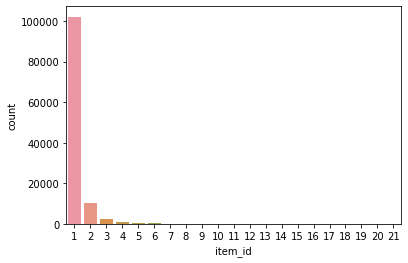

In [12]:
print(df_info_clients['item_id'].value_counts(normalize=False))
sns.countplot(data=df_info_clients, x="item_id")

#### 3.1.2) City

sao paulo                18411
rio de janeiro            8121
belo horizonte            3218
brasilia                  2452
curitiba                  1799
campinas                  1722
porto alegre              1640
salvador                  1498
guarulhos                 1387
sao bernardo do campo     1100
niteroi                   1047
santo andre                906
osasco                     894
goiania                    852
santos                     836
Name: client_city, dtype: int64


<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

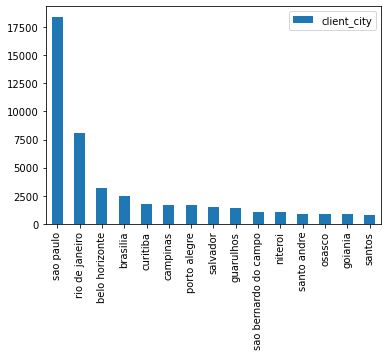

In [13]:
print(df_info_clients['client_city'].value_counts(normalize=False).head(15))
plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
pd.DataFrame(df_info_clients['client_city'].value_counts(normalize=False).head(15)).plot(kind='bar')
plt.show()

#### 3.1.3) State

SP    49121
RJ    15182
MG    13527
RS     6433
PR     5908
SC     4254
BA     3994
DF     2467
GO     2396
ES     2332
PE     1878
CE     1537
MT     1116
PA     1103
MS      847
MA      837
PB      630
PI      567
RN      565
AL      458
SE      395
TO      334
RO      280
AM      170
AC       93
AP       84
RR       50
Name: client_state, dtype: int64


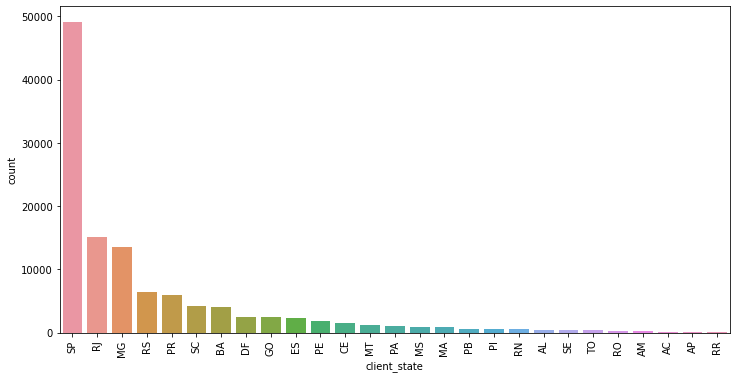

In [14]:
print(df_info_clients['client_state'].value_counts(normalize=False))
plt.figure(figsize=(12, 6))
sns.countplot(data=df_info_clients, x="client_state", order = df_info_clients['client_state'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

#### 3.1.4) Months

       date  order_per_month
0   2016-09                3
1   2016-10              384
2   2016-12                1
3   2017-01             1008
4   2017-02             2002
5   2017-03             3134
6   2017-04             2783
7   2017-05             4340
8   2017-06             3756
9   2017-07             4811
10  2017-08             5143
11  2017-09             5054
12  2017-10             5542
13  2017-11             8962
14  2017-12             6442
15  2018-01             8382
16  2018-02             7898
17  2018-03             8453
18  2018-04             8194
19  2018-05             8176
20  2018-06             7369
21  2018-07             7294
22  2018-08             7426
23  2018-09                1


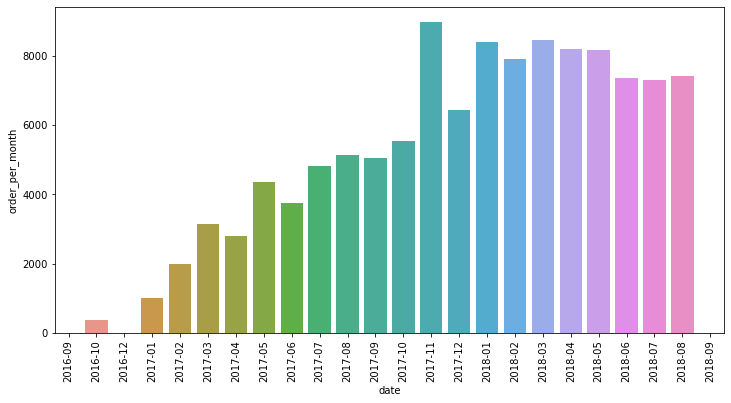

In [15]:
query = """
select strftime('%Y-%m',order_date) as date,
count(id) as order_per_month
from df_info_clients
group by date
"""

print(ps.sqldf(query, locals()))
plt.figure(figsize=(12, 6))
sns.barplot(data=ps.sqldf(query, locals()), x="date", y="order_per_month")
plt.xticks(rotation=90)
plt.show()

#### 3.1.5) Years

   date  order_per_year
0  2016             388
1  2017           52977
2  2018           63193


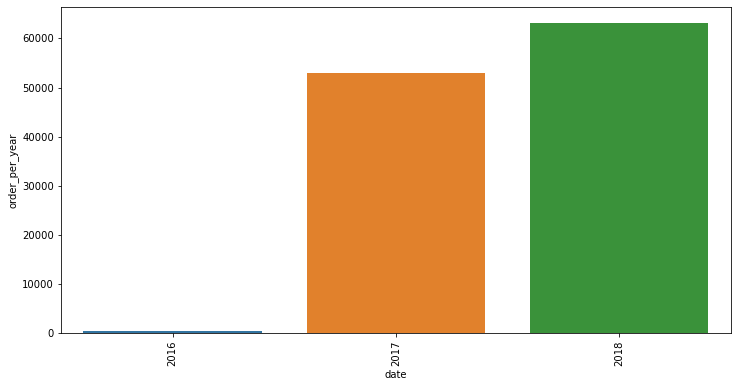

In [16]:
query = """
select strftime('%Y',order_date) as date,
count(id) as order_per_year
from df_info_clients
group by date
"""

print(ps.sqldf(query, locals()))
plt.figure(figsize=(12, 6))
sns.barplot(data=ps.sqldf(query, locals()), x="date", y="order_per_year")
plt.xticks(rotation=90)
plt.show()

#### 3.1.6) Category

        category_english  count_category
0         bed_bath_table           11989
1          health_beauty           10030
2         sports_leisure            9002
3        furniture_decor            8829
4  computers_accessories            8150
5             housewares            7380
6          watches_gifts            6211
7              telephony            4724
8           garden_tools            4589
9                   auto            4399


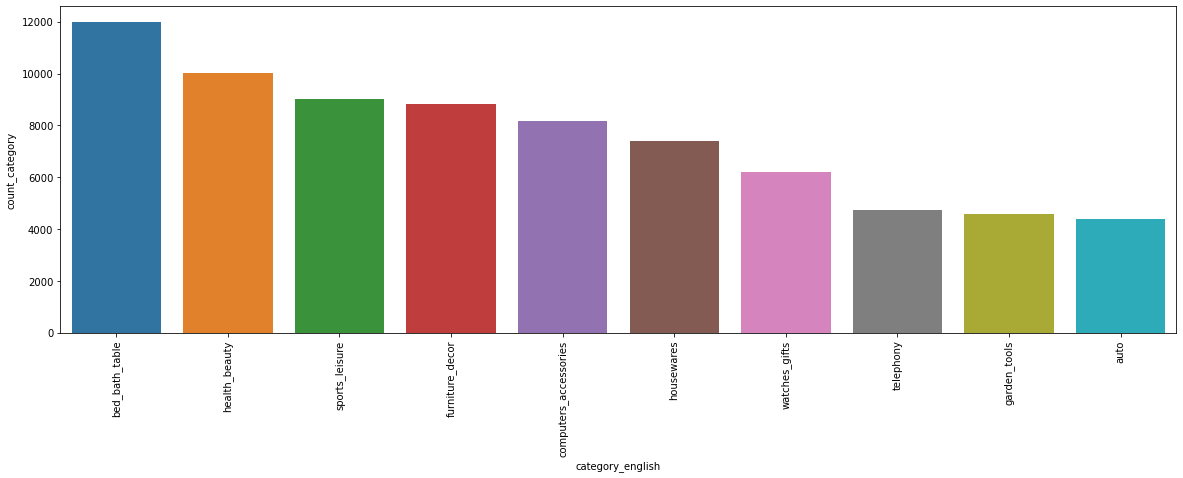

In [17]:
query = """
select category_english,
count(id) as count_category
from df_info_clients
group by category_english
order by count_category desc
limit 10
"""

print(ps.sqldf(query, locals()))
plt.figure(figsize=(20, 6))
sns.barplot(data=ps.sqldf(query, locals()), x="category_english", y="count_category")
plt.xticks(rotation=90)
plt.show()

### 3.2) Numerical variables

In order to make our job easier, I am going to define some functions of statistics and graphs

In [18]:
def statistics(df_column):
    column_mean = df_column.mean()
    column_median = df_column.median()
    column_std = df_column.std()
    column_min = df_column.min()
    column_max = df_column.max()
    column_skew = df_column.skew()
    column_kutosis = df_column.kurtosis()
    
    stats = pd.DataFrame([column_mean, column_median, column_std, column_min, column_max, column_skew, column_kutosis]).T
    stats.columns = ['mean', 'median', 'std', 'min', 'max', 'skew', 'kurtosis']
    
    return stats

In [19]:
def histogram(df_column):
    plt.figure(figsize=(12, 6))
    return sns.distplot(df_column)

#### 3.1) Order's Price 

In [20]:
statistics(df_info_clients['order_price'])

,mean,median,std,min,max,skew,kurtosis
0,120.749041,74.9,183.86179,0.85,6735.0,7.860769,118.931619


<AxesSubplot:xlabel='order_price', ylabel='Density'>

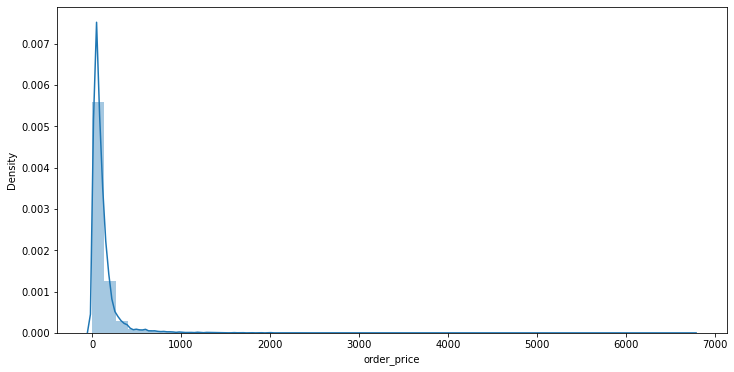

In [21]:
histogram(df_info_clients['order_price'])

<AxesSubplot:ylabel='Density'>

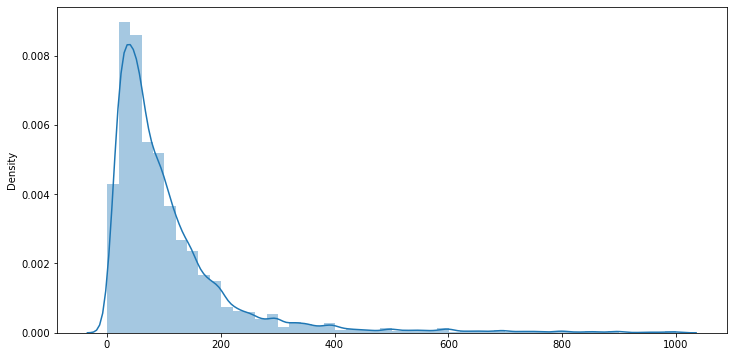

In [22]:
histogram(df_info_clients[df_info_clients['order_price']<1000][['order_price']])

#### 3.2)Delivery Price

In [23]:
statistics(df_info_clients['delivery_price'])

,mean,median,std,min,max,skew,kurtosis
0,20.062962,16.32,15.846783,0.0,409.68,5.550551,57.94742


<AxesSubplot:xlabel='delivery_price', ylabel='Density'>

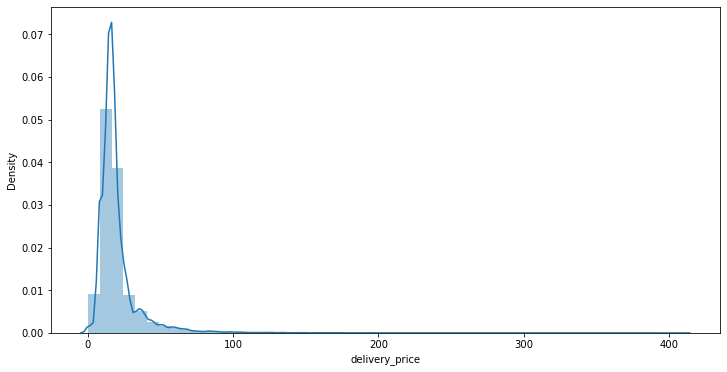

In [24]:
histogram(df_info_clients['delivery_price'])

<AxesSubplot:ylabel='Density'>

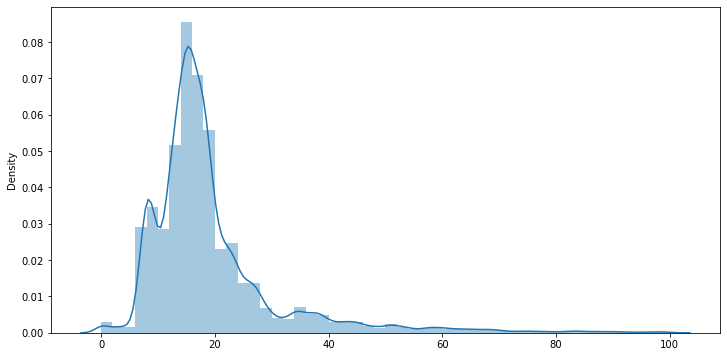

In [25]:
histogram(df_info_clients[df_info_clients['delivery_price']<100][['delivery_price']])

#### 3.3)Total Price 

In [26]:
statistics(df_info_clients['total_price'])

,mean,median,std,min,max,skew,kurtosis
0,172.913586,108.185,267.645592,0.0,13664.08,14.142156,511.025141


<AxesSubplot:xlabel='total_price', ylabel='Density'>

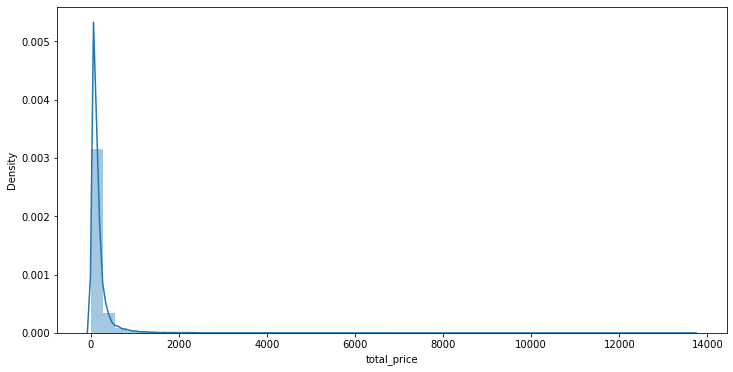

In [27]:
histogram(df_info_clients['total_price'])

<AxesSubplot:ylabel='Density'>

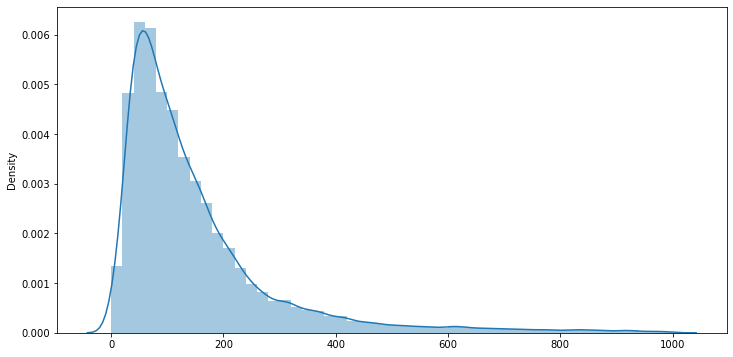

In [28]:
histogram(df_info_clients[df_info_clients['total_price']<1000][['total_price']])

#### 3.4) Review

In [29]:
statistics(df_info_clients['review'])

,mean,median,std,min,max,skew,kurtosis
0,4.017433,5.0,1.397936,1.0,5.0,-1.247712,0.128458


In [30]:
print("Count of the star rating reviews")
df_info_clients['review'].value_counts(normalize=False)

Count of the star rating reviews


5    65464
4    22012
1    15109
3     9841
2     4132
Name: review, dtype: int64

In [31]:
df_info_clients['review'].value_counts(normalize=True)

5    0.561643
4    0.188850
1    0.129626
3    0.084430
2    0.035450
Name: review, dtype: float64

<AxesSubplot:xlabel='review', ylabel='Density'>

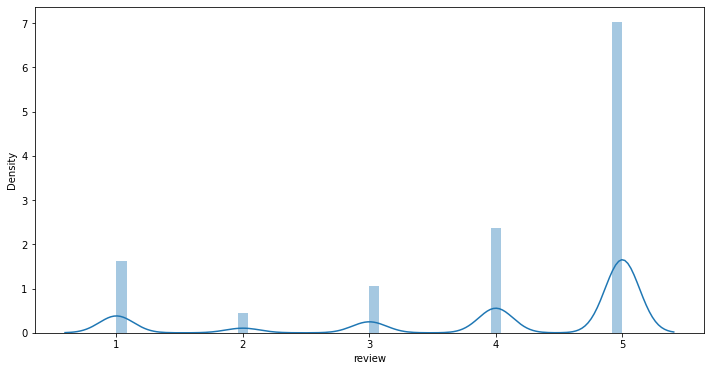

In [32]:
histogram(df_info_clients['review'])

In [33]:
print(str(df_info_clients['review'].value_counts(normalize=False).sum()) +' clients rated the order and ' + str(df_info_clients['id'].count()) + ' clients made an order in this period, that, 100% of the clients rated the order')

116558 clients rated the order and 116558 clients made an order in this period, that, 100% of the clients rated the order


#### 3.4) Parcels Pay

In [34]:
df_info_clients['divided_pay'].value_counts(normalize=False)

1     58012
2     13515
3     11651
4      7924
10     6867
5      5982
8      5055
6      4587
7      1804
9       724
12      166
15       93
18       38
24       34
11       25
20       21
13       19
14       16
16        7
17        7
21        6
0         3
22        1
23        1
Name: divided_pay, dtype: int64

<AxesSubplot:xlabel='divided_pay', ylabel='Density'>

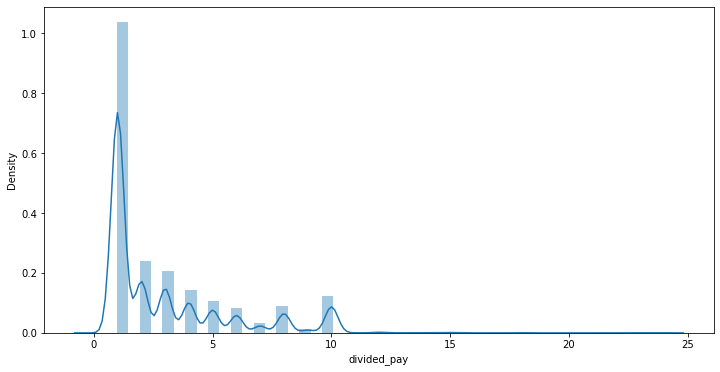

In [35]:
histogram(df_info_clients['divided_pay'])

### 4) Creating Hypothesis 

#### 4.1) Which group of customers should we send each marketing campaign?

1) Clients living in southeast of Brazil are more likely to buy more products.


#### 4.2) How to define which products should appear as a suggestion for each type of customer?

1) The correlation between category and the client's city

2) The correlation between category and the client's state


#### 4.3) How can we increase the sales conversion?

1) Sales that were delivered quicker has a better rating review

2) Sales with lower delivery prices has a better rating review

3) Sales with no develivery expenses are more likely to be bought

4) Sales that were delivered after the estimated date has a lower rating

5) Bed, bath, table, heath and beauty are more likely to be bought 

6) The clients are more likely to buy near holidays such as christmas

# Bivariate Analysis

In [78]:
def statistics_bi (col1, col2, df):
    x_mean = df[[col1, col2]].groupby([col1]).mean().reset_index().sort_values(by = [col1])
    x_count = df[[col1, col2]].groupby([col1]).count().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_median = df[[col1, col2]].groupby([col1]).median().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_std = df[[col1, col2]].groupby([col1]).std().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_min = df[[col1, col2]].groupby([col1]).min().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_max = df[[col1, col2]].groupby([col1]).max().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_skew = df[[col1, col2]].groupby([col1]).skew().reset_index().sort_values(by = [col1]).iloc[:,1]
    
    x_stats = pd.concat( [x_mean, x_median, x_std, x_min, x_max, x_skew, x_count], axis = 1)
    x_stats.columns = [col1,'mean', 'median', 'std', 'min', 'max', 'skew', 'count']
    return x_stats
    

## State X Price

In [107]:
statistics_bi ('client_state', 'order_price', df_info_clients).sort_values(by = ['count'], ascending=False)

,client_state,mean,median,std,min,max,skew,count
25,SP,109.935826,69.900,164.794615,0.85,6499.00,8.372039,49121
18,RJ,124.920677,79.900,187.845505,0.85,4799.00,7.160773,15182
10,MG,120.190454,75.900,178.714278,3.85,4099.99,7.519731,13527
22,RS,121.477110,75.000,178.521694,3.06,3124.00,6.480374,6433
17,PR,118.520140,72.500,178.304732,2.90,2999.99,6.774623,5908
23,SC,125.193853,75.000,195.191611,3.90,3109.99,6.813985,4254
4,BA,134.056214,79.990,203.387776,5.20,2999.89,6.222613,3994
6,DF,126.639838,79.000,225.588121,4.90,3999.00,9.664926,2467
8,GO,126.915630,79.900,173.298543,3.90,2299.95,5.277412,2396
7,ES,121.402328,77.920,213.014756,5.99,6729.00,15.356454,2332


In [80]:
statistics_bi('client_city', 'order_price', df_info_clients).sort_values(by = ['count'], ascending=False).head(10)

,client_city,mean,median,std,min,max,skew,count
3576,sao paulo,108.135525,67.90,163.812849,1.20,4399.87,7.493866,18411
3136,rio de janeiro,126.106060,79.90,192.616447,5.30,3930.00,6.623424,8121
451,belo horizonte,112.906541,69.99,162.660013,4.90,3099.00,6.689155,3218
556,brasilia,127.097834,79.00,226.186535,4.90,3999.00,9.641405,2452
1139,curitiba,120.752991,69.90,191.152565,2.90,2999.99,6.777059,1799
704,campinas,113.402474,66.99,167.875505,4.90,1999.99,5.540527,1722
2945,porto alegre,118.245518,79.00,144.303608,5.99,1934.00,5.283671,1640
3228,salvador,128.918451,79.90,179.904010,5.20,2951.00,6.027207,1498
1523,guarulhos,110.863453,74.90,145.896416,4.99,1999.00,5.810638,1387
3409,sao bernardo do campo,97.259682,59.99,137.729551,6.04,1999.00,6.374592,1100


## City Capital X Price

In [91]:
df_capitals = pd.read_csv('data/capital.csv')
df_capitals

,Capitais,Estados,Siglas dos estados,Regiões
0,aracaju,Sergipe,SE,Nordeste
1,belem,Pará,PA,Norte
2,belo horizonte,Minas Gerais,MG,Sudeste
3,boa vista,Roraima,RR,Norte
4,braslia,Distrito Federal,DF,Centro-Oeste
5,campo grande,Mato Grosso do Sul,MS,Centro-Oeste
6,cuiaba,Mato Grosso,MT,Centro-Oeste
7,curitiba,Paraná,PR,Sul
8,florianopolis,Santa Catarina,SC,Sul
9,fortaleza,Ceará,CE,Nordeste


In [93]:
df_only_capitals = df_info_clients.loc[df_info_clients['client_city'].isin(df_capitals['Capitais'])].reset_index(drop=True)

In [106]:
print('The capitals represent ' + 
      str(round(df_only_capitals['id'].count()/df_info_clients['id'].count(),4)*100) + 
      '% of the total orders')

print('The capitals represent ' + 
      str(round(df_only_capitals['order_price'].sum()/df_info_clients['order_price'].sum(),2)*100) + 
      '% of the total spent ')

The capitals represent 35.8% of the total orders
The capitals represent 36.0% of the total spent 


In [96]:
statistics_bi('client_city', 'order_price', df_only_capitals).sort_values(by = ['count'], ascending=False)

,client_city,mean,median,std,min,max,skew,count
23,sao paulo,108.135525,67.900,163.812849,1.20,4399.87,7.493866,18411
20,rio de janeiro,126.106060,79.900,192.616447,5.30,3930.00,6.623424,8121
2,belo horizonte,112.906541,69.990,162.660013,4.90,3099.00,6.689155,3218
6,curitiba,120.752991,69.900,191.152565,2.90,2999.99,6.777059,1799
16,porto alegre,118.245518,79.000,144.303608,5.99,1934.00,5.283671,1640
21,salvador,128.918451,79.900,179.904010,5.20,2951.00,6.027207,1498
9,goiania,132.189800,79.900,192.714680,6.25,2299.95,5.410136,852
8,fortaleza,137.248699,79.990,184.134333,7.80,1890.00,4.811982,753
18,recife,131.218169,79.900,206.247039,6.99,3700.00,9.169411,699
7,florianopolis,130.192783,71.000,222.748952,5.99,3109.99,7.202499,672


## Southeast X Price

In [115]:
df_SE = df_info_clients[df_info_clients['client_state'].isin(['SP', 'RJ', 'MG'])] 

In [119]:
print('The Southeast cities represent ' + 
      str(round(df_SE['id'].count()/df_info_clients['id'].count(),4)*100) + 
      '% of the total orders')

print('The Southeast cities represent ' + 
      str(round(df_SE['order_price'].sum()/df_info_clients['order_price'].sum(),2)*100) + 
      '% of the total spent ')

print('The Southeast has ' + 
      str(df_info_clients['client_city'].drop_duplicates().count()) + 
      ' different cities ')

The Southeast cities represent 66.77% of the total orders
The Southeast cities represent 63.0% of the total spent 
The Southeast has 4095 different cities 


In [120]:
statistics_bi('client_city', 'order_price', df_SE).sort_values(by = ['count'], ascending=False)

,client_city,mean,median,std,min,max,skew,count
1315,sao paulo,108.135525,67.90,163.812849,1.20,4399.87,7.493866,18411
1138,rio de janeiro,126.106060,79.90,192.616447,5.30,3930.00,6.623424,8121
142,belo horizonte,112.906541,69.99,162.660013,4.90,3099.00,6.689155,3218
246,campinas,113.402474,66.99,167.875505,4.90,1999.99,5.540527,1722
540,guarulhos,110.863453,74.90,145.896416,4.99,1999.00,5.810638,1387
...,...,...,...,...,...,...,...,...
1207,santa rita da floresta,79.000000,79.00,NaN,79.00,79.00,NaN,1
1202,santa maria do salto,38.000000,38.00,NaN,38.00,38.00,NaN,1
1199,santa maria,8.000000,8.00,NaN,8.00,8.00,NaN,1
491,frei gaspar,74.900000,74.90,NaN,74.90,74.90,NaN,1
